# 2.3. Tratamiento de valores atípicos

### Introducción

Los _datos con ruido (noisy data) y valores atípicos (outliers values)_, son conceptos diferentes, que generalmente se detectan visualmente y/o con técnicas estadísticas.  
Por un lado, los _datos con ruido_ representan errores en los datos, que pueden surgir debido a un mal funcionamiento de un sensor, un dato mal ingresado por el usuario, etc.
Por otro lado, los _valores atípicos_ son valores que caen lejos de la mayoría de los valores existentes, por ejemplo, un sensor de temperatura que marque 35°C en invierno en Neuquén. Un valor atípico puede ser válido o puede ser un error (noisy).

Cualquiera sea el caso, se deben analizar e implementar mecanismos para detectarlos y luego  eliminarlos o corregirlos. Dejar este tipo de valores en los datos pueden afectar los resultados de los análisis. 

### Identificación de valores atípicos

El primer paso para analizar la existencia de valores atípicos en los datos es la identificación de los mismos como tales. En este caso la _visualización_ es una de las herramientas más comunes para identificarlos ya que brindan una visión clara de la distribución de los datos. 

Vamos a agregar la siguiente *librería*:
+ <a href="https://pandas.pydata.org/" target="_blank">Matplotlib</a>: para crear visualizaciones estáticas, animadas e interactivas en Python.

Hay diferentes gráficos que podemos utilizar para visualizar estos valores. Veremos algunos de ellos.

> _Comenzamos creando un `dataframe`con diferentes datos:_


In [1]:
#importamos las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos = {'Peso': [50.6, 76.9, 45.8, 78.2, 67.9, 85.8, 43.6, 98.7, 283.8, 65.9, 48]}
df_pesos = pd.DataFrame(datos)
df_pesos

Peso
0    50.6
1    76.9
2    45.8
3    78.2
4    67.9
5    85.8
6    43.6
7    98.7
8   283.8
9    65.9
10   48.0

### Diagramas de dispersión

Para hacer el gráfico de **dispersión (scatter plot)** hay dos métodos principales:
- `plt.subplots`: que permite crear una figura y uno o más ejes (subgráficos) dentro de la misma. Por ejemplo:  `fig, ax = plt.subplots(figsize=(10,4))` define a  `fig` como la figura, `ax` un subgráfico o área donde se dibujan los datos, y `figsize` el parámetro para indicar el tamaño de la misma. 
- `ax.scatter(x,y)`:  donde `x` representa los valores del `eje x`, `y` los valores que debe tomar el `eje y` y se define para el área creada (`ax`).


> _Para graficar los pesos de las personas de `df_pesos` hacemos:_

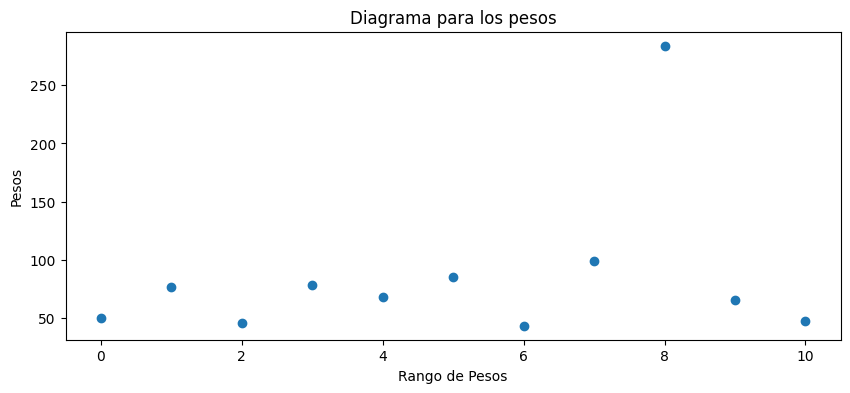

In [2]:
#comenzamos enviando datos para la configuración del grafico
#Defino el tamaño del grafico
fig, ax = plt.subplots(figsize=(10,4))

# Agrego etiquetas para eje x, eje y y titulo
plt.xlabel("Rango de Pesos")
plt.ylabel("Pesos")

# Le agrego la leyenda del titulo
plt.title("Diagrama para los pesos")

#la funcion scatter toma como primer parámetro el eje x 
# que es la cantidad de pesos registrados, en este caso el rango de 0 a 13
# y el eje y que es la columna de pesos
ax.scatter(x=range(len(df_pesos['Peso'])), y=df_pesos['Peso'])

# podemos guardar la figura generada en la carpeta archivosGenerados/
plt.savefig("archivosGenerados/ScatterPesos.png")

plt.show()

Como podemos observar en el diagrama el valor de 283.8 parece un valor atípico, aunque podría ser real. 

### Rango Intercuartílico (IQR)

Existen variables importantes que nos permiten analizar la distribución de los datos e identificar valores atípicos. 

````{admonition} Variables importantes
:class: important

Las variables mas importantes a calcular a la hora de buscar atípicos son:
- _mediana_: valor del medio (impar) o promedio de los dos valores centrales (par)
- _cuartiles_: división de los datos en 4 partes iguales, cada una con el 25%:
    - _Q1_: Es el valor a partir del cual tengo el 25% de los datos por debajo y el 75% por arriba. También se llama cuartil inferior.
    - _Q2_: Es la mediana, es decir el valor a partir del cual el 50% de los datos están por debajo y por arriba.
    - _Q3_: Es el valor a partir del cual el 75% de los datos están por debajo y el 25% por arriba.

En el grafico siguiente podemos ver estos valores en una distribución normal:
<img src="imagenes/graficosIQR1.png"/>

````

> _Vamos primero a ordenar `df_pesos` para ver como son los datos:_ 

In [3]:
#primero ordenamos los pesos para conocerlos
# tambien se podria haber hecho como {df_pesos["Peso"].sort_values()} que devuelve una serie
df_pesos.sort_values(by='Peso', ascending=True)


Peso
6    43.6
2    45.8
10   48.0
0    50.6
9    65.9
4    67.9
1    76.9
3    78.2
5    85.8
7    98.7
8   283.8

> _Vamos ahora a calcular los cartiles de los datos de los pesos de `df_pesos`:_ 

In [4]:
# calculo el primer cuartil (25%)
q1 = np.quantile(df_pesos['Peso'], 0.25)  

print(f'El primer cuartil Q1 (25%) es {q1}')

# calculo el segundo cuartil (50% o mediana)
q2 = np.quantile(df_pesos['Peso'], 0.50)  

print(f'El segundo cuartil Q2 (mediana) (50%) es {q2}')

# calculo el tercer cuartil (75%)
q3 = np.quantile(df_pesos['Peso'], 0.75)  

print(f'El tercer cuartil Q3 (75%) es {q3}')



El primer cuartil Q1 (25%) es 49.3
El segundo cuartil Q2 (mediana) (50%) es 67.9
El tercer cuartil Q3 (75%) es 82.0


Otra variable importante de entender para graficar la dispersión de los datos es el **rango intercuartil (IQR)**.

````{admonition} Rango Intercuartil (IQR) 
:class: important

El _IQR_ es la distancia entre el primer (_Q1_) y el tercer cuartil (_Q3_) indicando la dispersión media de los datos, es decir, sólo incluye el 50% medio de los datos. De esta forma no se  afectado por valores extremos.

_IQR = Q3 - Q1_
````

> _Calculando manualmente el IQR:_

In [5]:
# calculo el iqr
iqr = q3-q1  

print(f'El IQR es {iqr}')

El IQR es 32.7


Debido a que _Q1_ , la _mediana_ y _Q3_ juntos no contienen información sobre los puntos finales de los datos, se puede obtener un resumen más completo de la forma de una distribución al proporcionar también los valores de datos más bajos y más altos. Esto se conoce como el **_resumen de cinco números_**: 
- _mediana (Q2)_,
- _Q1_,
- _Q3_ ,
- _valor minimo_, el menor valor del conjunto de datos,
- _valor_maximo_, el mayor valor del conjunto de datos





````{admonition} Límites mínimo y máximo
:class: important

Una regla general común para identificar valores atípicos sospechosos es seleccionar valores que caigan en al menos **1,5 × IQR** por encima del tercer cuartil (_Q3_) o por debajo del primer cuartil (_Q1_). 

Entonces, se definen dos valores más como:
- _limite máximo = Q3 + 1,5 × IQR_
- _limite mínimo = Q1 - 1,5 × IQR_

````

>_Vamos primero a calcular, con nuestros datos, los valores de los límites mínimo y máximo:_


In [6]:
## Calculamos el limite maximo para el cual los valores mayores a ese
# son considerados outliers 
limite_max = q3+(1.5*iqr)
print(f'El limite máximo es: {limite_max}')

## Calculamos el limite mínimo para el cual los valores menores a ese
# son considerados outliers 
limite_min = q1-(1.5*iqr)
print(f'El limite mínimo es: {limite_min}')

El limite máximo es: 131.05
El limite mínimo es: 0.2499999999999929


El resultado significa que los valores mas grandes que 131.05 y menores a 0.249 serán considerados atípicos. 

### Diagramas de cajas

Otro gráfico útil y generalmente utilizado para graficar valores atípicos son los **diagramas de caja (_boxplot_)**.

````{admonition} Diagramas boxplot 
:class: important

Los **_boxplot_** grafican según el **_resumen de cinco números_** de la siguiente forma:
- En los extremos de la caja están los cuartiles, de modo que la longitud de la caja  es justamente el _IQR_.
- La _mediana_ está marcada por una línea dentro de la caja (_Q2_).
- _Q1_ es el valor inferior donde comienza de la caja.
- _Q3_ es el valor superior donde termina la caja.
- Dos líneas (llamadas bigotes) fuera de la caja que se extienden hasta las observaciones más bajas (_valor minimo_) y más altas (_valor maximo_), que no son consideradas atípicas según la regla del IQR:
    - _bigote inferior_ es el valor mas chico de los datos, pero mayor al _limite mínimo_
    - _bigote superior_ es el valor mas alto de los datos, pero menor al _limite máximo_

En la figura lo podemos observar los valores (en una distribución normal):
<img src="imagenes/graficosIQR2.png"/>

````

El gráfico de los **diagramas de caja (_boxplot_)** se realiza con el método `ax.boxplot()` donde se le envía como parámetro la serie (columna) a graficar.

>_Graficamos el boxplot con los valores calculados:_

In [7]:
#Defino el tamaño del grafico
fig, ax = plt.subplots(figsize=(2, 8))

# Agrego etiquetas para eje x, eje y y titulo
plt.xlabel("Pesos")
plt.ylabel("Medidas")

# para indicar que valores me muestre en el eje x o y, se usa xticks o yticks
# definimos para el eje y
#desde 40 hasta 301 de 10 en 10
plt.yticks(np.arange(40, 301, 5))  

# Le agrego la leyenda del titulo
plt.title("Boxplot para los pesos")
ax.boxplot(df_pesos['Peso'])
# podemos guardar la figura generada
plt.savefig("archivosGenerados/BoxPlotPesos.png")

#la mostramos
plt.show()



Como podemos observar en el gráfico tenemos los valores:
- _Q1_ (borde inferior de la caja) = 49.3
- _Q2_ (linea en naranja en la caja) = 67.9
- _Q3_ (borde superior de la caja) = 82
- _valor minimo_ = 43.6
- _valor maximo_ = 98.7

### Histogramas

Por último lo podemos graficar en un diagrama de **histogramas** el cual muestra la distribución de frecuencias de un conjunto de datos, es decir, agrupa los datos en intervalos (llamados "bins") y muestra cuántos valores caen en cada intervalo. 


````{admonition} Histogramas
:class: important

Los **histogramas** se componen de: 
- _eje X_: los intervalos de valores (_bins_).
- _eje Y_: la frecuencia (cantidad de datos) en cada intervalo.
- _Barras_: representan la cantidad de datos dentro de cada _bin_.

Un dato importante es indicar el número de _bins_ deseado. El mismo se utiliza para dividir el rango de datos en esa cantidad de intervalos de igual tamaño.

````

Por lo tanto, al construir un **histograma** debemos: (1) indicar el rango de datos en intervalos (_bins_), (2) contar cuántos datos caen en cada _bins_ y (3) dibujar una barra para cada uno cuya altura es su frecuencia. Por suerte python lo hace solito!

> _Recordemos nuestros datos ordenados:_

In [8]:
df_pesos.sort_values(by='Peso')

Peso
6    43.6
2    45.8
10   48.0
0    50.6
9    65.9
4    67.9
1    76.9
3    78.2
5    85.8
7    98.7
8   283.8

Para construir el **histograma** hay que enviarle como parámetro el número de _bins_. En nuestro ejemplo `df_pesos['Peso']` tenemos datos que van desde 43.6 a 283.8, entonces el `ancho` se define como el `valor_maximo-valor_minimo` (283.8 - 43.6 = 240.2) y luego ese dato dividido la cantidad de `bins=5` (48.04), entonces `ancho = (valor_maximo-valor_minimo)/bins`. 
Note que estos valores no son los mismos que los definidos en el _boxplot_.

Para comprender el funcionamiento general del diagrama y la construcción de los bins, podemos definir manualmente los bordes como:
- _Primer borde_: 43.6 (valor mínimo en los datos)
- _Segundo borde_: 43.6 + 48.04 (ancho) = 91.64
- _Tercer borde_: 91.64 + 48.04 (ancho) = 139.68
- _Cuarto borde_: 139.68 + 48.04 (ancho) = 187.72
- _Quinto borde_: 187.72 + 48.04 (ancho) = 235.76
- _Sexto borde_: 235,76 + 48.04 (ancho) = 283.8 (valor máximo en los datos)

Entonces cada _bins_ se compone de:
- _bins1_: datos de 43.6 a 91.64
- _bins2_: datos de 91.64 a 139.68
- _bins3_: datos de 139.68 a 187.72
- _bins4_: datos 187.72 a 235.76
- _bins5_: datos 235.76 a 283.8

Como podemos observar 9 datos entran en el _bins1_, 1 solo en el _bins2_, los demas estan vacios, y luego solo 1 en el _bins5_. 

Para graficar el histograma podemos obtener los valores de cada borde y la cantidad de datos en cada _bins_ según el método `hist()`.

>_Graficamos el histograma con nuestros datos de los pesos:_

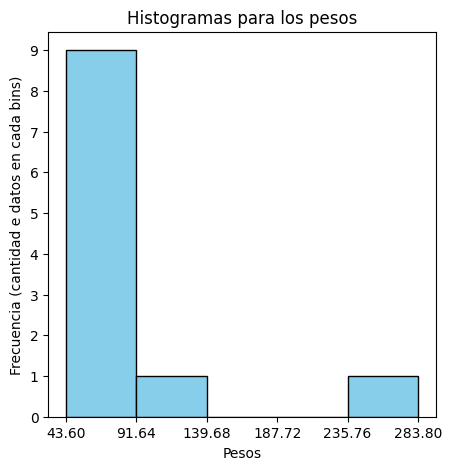

Para 5 bins, los bordes que definió el método hist() son [ 43.6   91.64 139.68 187.72 235.76 283.8 ] 
y la cantidad de datos en cada uno es [9. 1. 0. 0. 1.]


In [9]:
#Defino el tamaño del grafico
fig, ax = plt.subplots(figsize=(5, 5))

nbins=5

# Agrego etiquetas para eje x, eje y y titulo
plt.xlabel("Pesos")
plt.ylabel("Frecuencia (cantidad e datos en cada bins)")

# Creo el histograma y obtengo el valor de cada borde (bordes) generado automáticamente 
# y la cantidad de valores en cada uno.
# el guion bajo en el siguiente comando significa "obviar" los valores de la respuesta 
# que no quiero usar.
cantidad, bordes, _ = plt.hist(df_pesos['Peso'], bins=nbins, color='skyblue', edgecolor='black')

# Muestro en el hist los bordes en el eje x, nuevamente con xticks
# borde:.2f, el 2f hace que muestre solo 2 decimales de los numeros
plt.xticks(bordes, labels=[f"{borde:.2f}" for borde in bordes])

# y para el eje y tambien lo configuro
#desde 0 hasta 10 de 1 en 1
plt.yticks(np.arange(0, 10, 1))  

# Le agrego la leyenda del titulo
plt.title("Histogramas para los pesos")

# podemos guardar la figura generada
plt.savefig("archivosGenerados/HistPesos.png")

#la mostramos
plt.show()

# imprimo los valores para conocerlos
print(f'''Para {nbins} bins, los bordes que definió el método hist() son {bordes} 
y la cantidad de datos en cada uno es {cantidad}''')


A su vez, podemos calcular los bordes de cada _bins_ y los valores que caen en cada uno utilizando otros métodos como `cut()` de **Pandas**. Este método agrupa los valores numéricos en rangos de acuerdo a la cantidad enviada como parámetro.

> _Para el caso de los pesos, usamos `cut()` con 5 bins:_

In [10]:
numero_bins = 5

# Crear bins que es una serie
bins = pd.cut(df_pesos['Peso'], bins=numero_bins)
#bins.dtype
bins

0      (43.36, 91.64]
1      (43.36, 91.64]
2      (43.36, 91.64]
3      (43.36, 91.64]
4      (43.36, 91.64]
5      (43.36, 91.64]
6      (43.36, 91.64]
7     (91.64, 139.68]
8     (235.76, 283.8]
9      (43.36, 91.64]
10     (43.36, 91.64]
Name: Peso, dtype: category
Categories (5, interval[float64, right]): [(43.36, 91.64] < (91.64, 139.68] < (139.68, 187.72] < (187.72, 235.76] < (235.76, 283.8]]

Como podemos observar en el listado, de los 11 valores de las edades, clasifica cada uno en un _bins_ diferente, por eso devuelve 11 valores. Podemos observar también que los intervalos de los _bins_ no fueron exactamente iguales que para `hist()`, esto se debe a la forma en que cada método crea el _ bins_. La información de la forma que que `cut()` crea el _bins_ y sus parámetros, puede encontrarse <a href="https://pandas.pydata.org/docs/reference/api/pandas.cut.html" target="_blank">aca</a>.


Si ahora los queremos agrupar por valor único y contar, podemos usar el método `value_counts()` que jusyamente cuenta cuántas veces aparece cada valor distinto en la serie.

> _Usamos `value_counts()` para conocer la cantidad de valores en cada _bins_:_ 

In [11]:
# Contar cuántos datos caen en cada bin
cuantos_datos = bins.value_counts().sort_index()

cuantos_datos

Peso
(43.36, 91.64]      9
(91.64, 139.68]     1
(139.68, 187.72]    0
(187.72, 235.76]    0
(235.76, 283.8]     1
Name: count, dtype: int64

### Eliminación o reemplazo de atípicos

En esta parte vamos sólo a mostrar como eliminar o reemplazar los valores atípicos. 

> _Probamos borrar los valores atípicos, que son aquellos que cayeron mas alla del `limite_max` y `limite_min` que calculamos previamente:_

In [12]:
# crear un nuevo df que posea los 
# pesos que cayeron antes del limite_max 
df_pesos_sin_atipicos = df_pesos.loc[df_pesos['Peso']< limite_max,['Peso']]

#ordenos
df_pesos_sin_atipicos.sort_values(by = 'Peso')

Peso
6   43.6
2   45.8
10  48.0
0   50.6
9   65.9
4   67.9
1   76.9
3   78.2
5   85.8
7   98.7

Además de borrarlos, podriamos reemplazarlos por la _mediana_, _media_, o valores determinados.

>_Reemplazamos atípicos por la mediana:_

In [13]:
# busco la mediana que la teniamos en q2

#hago una copia primero
df_pesos_sin_atipicos2 = df_pesos.copy()

#print(df_pesos_sin_atipicos2)

#busco el valor atipico, como puede ser mas de uno se guarda en un df_atipico
df_atipico = df_pesos.loc[df_pesos['Peso']> limite_max, ['Peso']]

#print(f'Los valores atípicos son: \n{df_atipico}')

#itero sobre el df_atipico
for i in range(len(df_atipico)):
    #tomo el primer valor, y lo busco en todo el df_pesos_sin_atipicos para reemplazar
    #print(valor_atipico)
    valor_atipico = df_atipico.iloc[i]['Peso']

    #tambien funcionaba como 
    #df_pesos_sin_atipicos2.loc[:,'Peso'].replace(valor_atipico,q2)
    df_pesos_sin_atipicos2 = df_pesos_sin_atipicos2.replace(valor_atipico,q2)

df_pesos_sin_atipicos2

Peso
0   50.6
1   76.9
2   45.8
3   78.2
4   67.9
5   85.8
6   43.6
7   98.7
8   67.9
9   65.9
10  48.0